<a href="https://colab.research.google.com/github/Woongheelee7/Leon/blob/main/HW5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(threshold=np.inf, linewidth=np.inf) 
def partial_sum(arr,i):
    partial_sum=0
    for k in range(i+1):
      partial_sum+=arr[k]
      
    return partial_sum 
def gini_delta(arr,k):
    n=len(arr)
    sum=arr.sum()
    ratio_1=(k+1)/n
    ratio_2=1-ratio_1
    partial=partial_sum(arr,k)
    pro1=(partial/(k+1))
    pro1_1=1-pro1
    Rpro1=1-pro1**2-pro1_1**2


    pro2=((sum-partial)/(n-k-1))
    pro2_2=1-pro2
    Rpro2=1-pro2**2-pro2_2**2
    gini_delta=gini_index-ratio_1*Rpro1-ratio_2*Rpro2
    return gini_delta

In [2]:
def error_rate(p: float):
    """Classification error rate for a given binary class ratio"""
    return p if p < 0.5 else 1 - p

def gini_index(p: float):
    """Gini index for a given binary class ratio."""
    return 2 * p * (1 - p)

def entropy(p: float):
    """Entropy for a given binary class ratio, normalized by ln(2)"""
    return -(p * np.log(p + 1e-16) + (1 - p) * np.log(1 - p + 1e-16)) / (np.log(2) / 0.5)



In [3]:
cancer = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/breast_cancer.csv")
cancer["label"] = cancer["diagnosis"].apply(lambda x: 0 if x == "B" else 1)
cancer_label=cancer["label"]
cancer_texture=cancer["texture_mean"]
cancer_sub=pd.concat([cancer_label,cancer_texture],axis=1)
cancer_sorted=cancer_sub.sort_values(by='texture_mean')

gini_index=1-(cancer_label.sum()/len(cancer.label))**2-((len(cancer_label)-cancer.label.sum())/len(cancer_label))**2
gini_index



0.46753006075469244

In [7]:
label=np.array(cancer_sorted['label'])
texture_mean=np.array(cancer_sorted['texture_mean'])
delta=[]

for i in range(len(label)):
    G= gini_delta(label,i)
    delta.append(G)
delta[0]=0
print(delta.index(max(delta)))
texture_mean[delta.index(max(delta))]

315


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars


19.46

In [9]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
)
features = [
    # "radius_mean",
    "texture_mean"
    # "perimeter_mean",
    # "area_mean",
    # "smoothness_mean",
    # "compactness_mean",
    # "concavity_mean",
    # "concave_mean",
    # "symmetry_mean",
    # "fractal_mean",
    # "radius_se",
    # "texture_se",
    # "perimeter_se",
    # "area_se",
    # "smoothness_se",
    # "compactness_se",
    # "concavity_se",
    # "concave_se",
    # "symmetry_se",
    # "fractal_se",
    # "radius_extreme",
    # "texture_extreme",
    # "perimeter_extreme",
    # "area_extreme",
    # "smoothness_extreme",
    # "compactness_extreme",
    # "concavity_extreme",
    # "concave_extreme",
    # "symmetry_extreme",
    # "fractal_extreme",
]
label = "label"
dt_model.fit(X=cancer[features], y=cancer[label])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

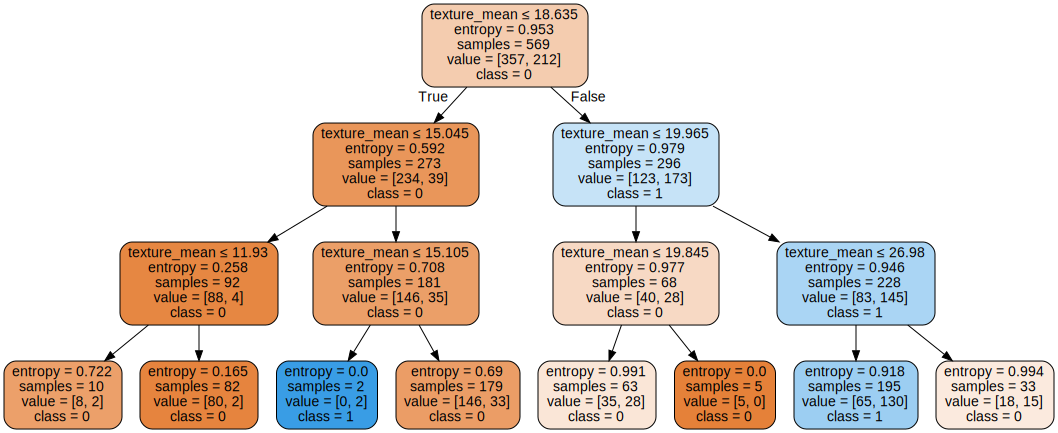

In [10]:
import graphviz

dot_data = tree.export_graphviz(
    decision_tree=dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=["0", "1"],  
    filled=True, 
    rounded=True,  
    special_characters=True,
    max_depth=3,
)  
graph = graphviz.Source(dot_data)  
graph.render("cancer_tree")
graph